In [1]:
require 'nn'
torch.setdefaulttensortype('torch.FloatTensor')
require 'image'


In [2]:
classes = {'airplane', 'automobile', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck'}
class2ids = {}  -- Build a mapping between object names and class ids.
for k,v in pairs(classes) do class2ids[v] = k end

In [13]:
function load_test_data()
	tesize = 10000
	-- download dataset
	if not paths.dirp('cifar-10-batches-t7') then
	   print ("dataset not found, downloading the dataset...")
	   local www = 'http://torch7.s3-website-us-east-1.amazonaws.com/data/cifar-10-torch.tar.gz'
	   local tar = paths.basename(www)
	   print ("uncompressing...")
	   os.execute('wget ' .. www .. '; '.. 'tar xvf ' .. tar)
	end

	subset = torch.load('cifar-10-batches-t7/test_batch.t7', 'ascii')
	testData = {
	   data = subset.data:t():double(),
	   labels = subset.labels[1]:double(),
	}
	testData.labels = testData.labels + 1

	testData.data = testData.data[{ {1,tesize} }]
	testData.labels = testData.labels[{ {1,tesize} }]


	testData.data = testData.data:reshape(tesize,3,32,32)

	testData.normdata = testData.data:clone():float()


 	cifarInfo = torch.load("model/cifarInfo.t7")
 	cifarMean = cifarInfo.mean
 	cifarStd = cifarInfo.std
	-- Now normalize the training and validation data.
	for i  = 1, 3 do
	    -- Subtracting the mean on each channel makes the values roughly between -128 and 128.
	    -- trainData.normdata[{{}, {i}, {}, {}}]:add(-cifarMean[i])
	    -- valData.normdata[{{}, {i}, {}, {}}]:add(-cifarMean[i])
	    testData.normdata[{{}, {i}, {}, {}}]:add(-cifarMean[i])
	    -- Dividing the std on each channel makes the values roughly between -1 and 1.
	    -- trainData.normdata[{{}, {i}, {}, {}}]:div(cifarStd[i])
	    -- valData.normdata[{{}, {i}, {}, {}}]:div(cifarStd[i])
	    testData.normdata[{{}, {i}, {}, {}}]:div(cifarStd[i])
	end

	return testData
end
testData = load_test_data()

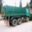

NO.1: Ground truth: truck || Prediction: truck	


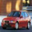

NO.2: Ground truth: automobile || Prediction: automobile	


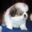

NO.3: Ground truth: dog || Prediction: dog	


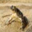

NO.4: Ground truth: frog || Prediction: bird	


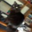

NO.5: Ground truth: cat || Prediction: cat	


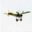

NO.6: Ground truth: airplane || Prediction: airplane	


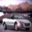

NO.7: Ground truth: automobile || Prediction: airplane	


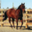

NO.8: Ground truth: horse || Prediction: horse	


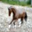

NO.9: Ground truth: horse || Prediction: horse	


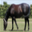

NO.10: Ground truth: horse || Prediction: horse	
	
Test accuracy is 0.8	


In [23]:
function main(testSize)
	local model = torch.load("model/CNN-epoch100.t7")

-- 	local testData = load_test_data()

	model:evaluate() -- turn on the evaluation mode

	-- need a testSize
	local raw_inputs = torch.Tensor(testSize, 3, 32, 32)
	local inputs = torch.Tensor(testSize, 3, 32, 32)
	local labels = torch.Tensor(testSize)
	for bi = 1, testSize do
		local rand_id = torch.random(1, testData.data:size(1))
		raw_inputs[bi] = testData.data[rand_id]
		inputs[bi] = testData.normdata[rand_id]
		labels[bi] = testData.labels[rand_id]
	end

	local predictions = model:forward(inputs)
	local predicted_label = torch.Tensor(testSize)
	for i = 1, predictions:size(1) do
	    local _, pos = predictions[i]:max(1)
	    predicted_label[i] = pos[1]
	end

	local test_acc = 0
	for i = 1, predictions:size(1) do
		itorch.image(raw_inputs[i])
		print("NO.".. i ..": Ground truth: ".. classes[labels[i]].. " || Prediction: ".. classes[predicted_label[i]] )
		if (predicted_label[i] == labels[i]) then
			test_acc = test_acc + 1
		end
	end
    
    print ("")
	print("Test accuracy is "..test_acc/testSize)
end

main(10)